In [127]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [128]:
img = cv2.imread('./test_image/test8.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


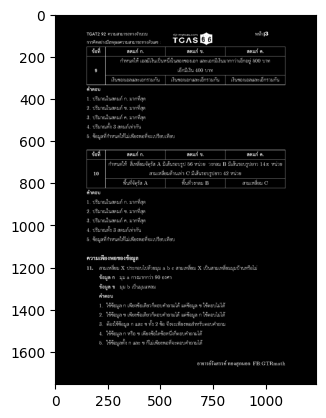

In [129]:
def thresholding(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    print(img_gray)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img)

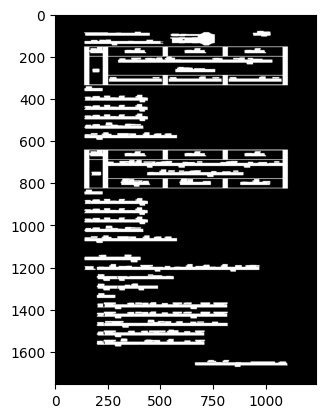

In [130]:
kernel = np.ones((3, 25), np.uint8)

#vertical lines kernel เพื่อเพิ่มขนาดของเส้นตามแนวตั้ง เพราะเราไม่รู้ว่ารูปที่ input เข้ามาจะเข้มแค่ไหน โดยใช้ kernel ขนาด 3x25 และใช้คำสั่ง dilate ในการทำการขยายขนาดของเส้น 1 ครั้ง โดยใช้ iterations=1
dilated = cv2.dilate(thresh_img, kernel, iterations=1)
plt.imshow(dilated, cmap='gray')

In [131]:
#หาเส้นขอบ โดยใช้ cv2.RETR_EXTERNAL คือการหาเส้นขอบที่เป็นเส้นขอบภายนอกที่สุด และ cv2.CHAIN_APPROX_NONE คือการหาเส้นขอบที่ไม่มีการประมาณ
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#เรียงค่าตาม Y ตามลำดับน้อยไปมาก
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1])

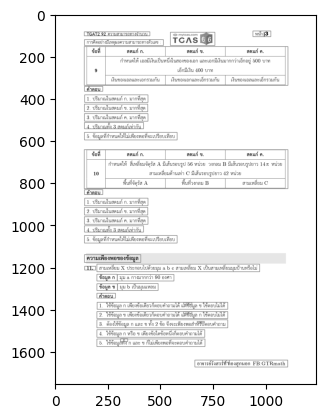

(36, 300, 3)


In [132]:
cropped_images = []

for ctr in sorted_contours_lines:
    x, y, w, h = cv2.boundingRect(ctr)
    
    #วาดสี่เหลี่ยมรอบตัวอักษร โดยใช้สี (40, 100, 250) และความหนา 2 pixel
    cv2.rectangle(img, (x, y), (x+w, y+h), (40, 100, 250), 2)

    #เอารูปเดิมมาตัด
    cropped_region = img[y:y+h, x:x+w] 
    cropped_images.append(cropped_region)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray') 
plt.show()
cv2.imshow(f'Cropped Image {1}', cv2.cvtColor(cropped_images[13], cv2.COLOR_BGR2GRAY))
print(cropped_images[13].shape)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[138 138 138 ... 138 138 138]
 [138 138 138 ... 138 138 138]
 [138 138 255 ... 255 255 138]
 ...
 [138 138 255 ... 255 255 138]
 [138 138 255 ... 255 255 138]
 [138 138 138 ... 138 138 138]]
[[138 138 138 ... 138 138 138]
 [138 138 138 ... 138 138 138]
 [138 138 255 ... 255 255 138]
 ...
 [138 138 255 ... 255 255 138]
 [138 138 255 ... 255 255 138]
 [138 138 138 ... 138 138 138]]
[[138 138 138 ... 138 138 138]
 [138 138 138 ... 138 138 138]
 [138 138 255 ... 255 255 138]
 ...
 [138 138 255 ... 255 255 138]
 [138 138 255 ... 255 255 138]
 [138 138 138 ... 138 138 138]]
[[138 138 138 ... 138 138 138]
 [138 138 138 ... 138 138 138]
 [138 138 255 ... 255 255 138]
 ...
 [138 138 255 ... 255 255 138]
 [138 138 255 ... 255 255 138]
 [138 138 138 ... 138 138 138]]
[[138 138 138 ... 138 138 138]
 [138 138 138 ... 138 138 138]
 [138 138 255 ... 255 255 138]
 ...
 [138 138 255 ... 255 255 138]
 [138 138 255 ... 255 255 138]
 [138 138 138 ... 138 138 138]]
[[138 138 138 ... 138 138 138]
 [138 138

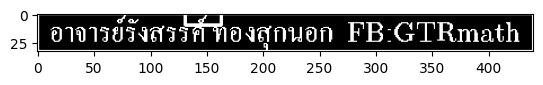

In [133]:
cropped_thresh = []
for i in cropped_images:
    cropped_thresh.append(thresholding(i))

cv2.imshow(f'Cropped Image {1}', cropped_thresh[2])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [134]:
def character_segmentation(img):
    # หาขนาดของภาพ
    heigh = img.shape[0]

    # ทำ CCA
    #num_labels คือ จำนวนตัวอักษรที่พบ
    #stats คือ ขนาดของตัวอักษรที่พบ
    num_labels, _, stats, _ = cv2.connectedComponentsWithStats(img, connectivity=8)
    
    segmented_characters = []

    # วนลูปเพื่อตัดตัวอักษรออกมา
    for i in range(1, num_labels):
        # ตัดขนาดของตัวอักษรออกมา
        x, y, w, h, _ = stats[i]
        
        top_margin = heigh
        bottom_margin = heigh
        
        #slicing ตัดตัวอักษรออกมา
        character_segment = img[max(0, y - top_margin):min(y + h + bottom_margin, img.shape[0]), x:x+w]
        print(character_segment)
        segmented_characters.append(character_segment)
    
    return segmented_characters


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255   0 ...   0   0 255]
 ...
 [255 255   0 ...   0   0 255]
 [255 255   0 ...   0   0 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0   0   0]
 [255 255   0   0   0 255 255 255   0]
 [255 255 255 255 255 255 255 255   0]
 [  0   0   0   0   0 255 255 255 255]
 [  0   0   0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0   0   0]
 [255 255   0   0   0 255 255   0   0]
 [255   0   0   0   0   0 255 255   0]
 [  0   0 255 255 255   0 255 255   0]
 [  0 255 255   0 255   0   0 255   0]
 [  0 255 255   0 255   0   0 255   0]
 [255 255 255 255 255   0   0 255   0]
 [255 255   0   0   0   0   0 255   0]
 [255   0   0   0   0   0   0 255   0]
 [255   0   0   0   0   0   0 255   0]
 [255   0   0   0   0   0   0 255   0]
 [255   0   0   0   0   0   0 255   0]
 [  0   0   0   0   0   0   

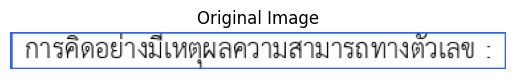

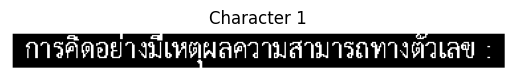

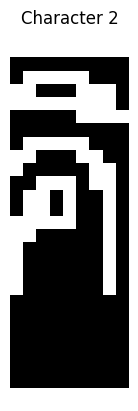

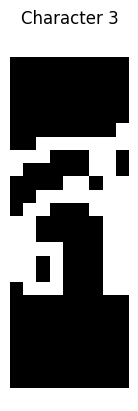

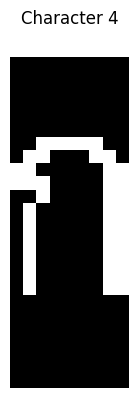

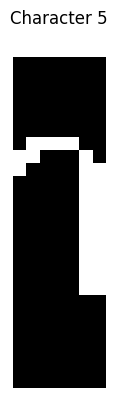

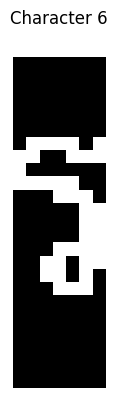

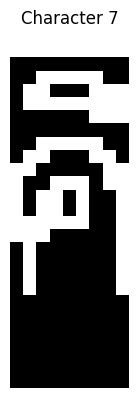

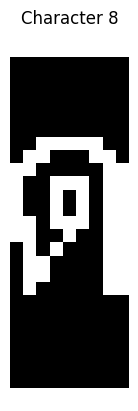

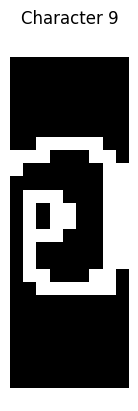

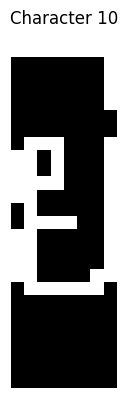

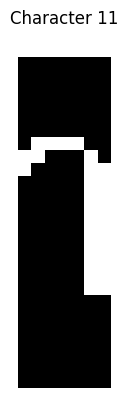

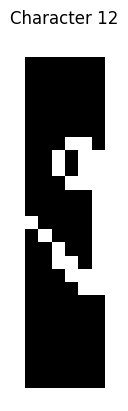

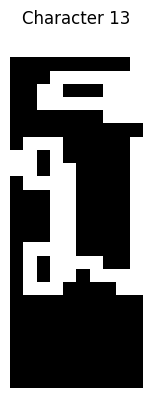

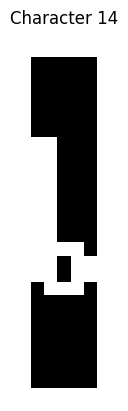

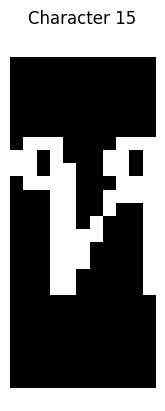

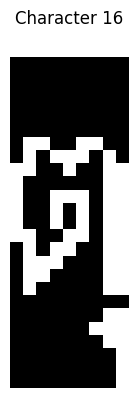

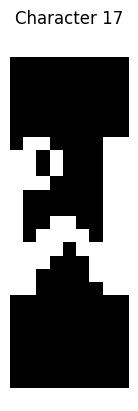

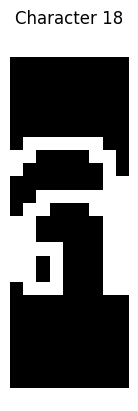

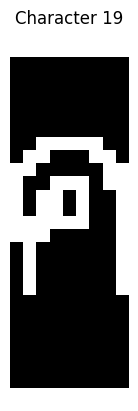

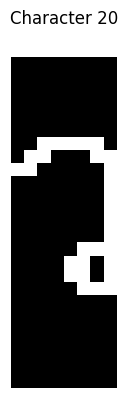

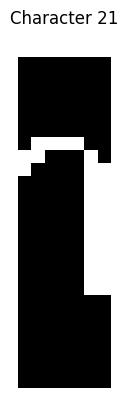

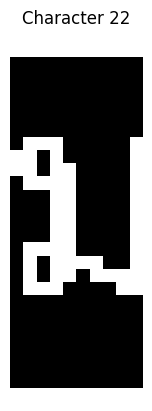

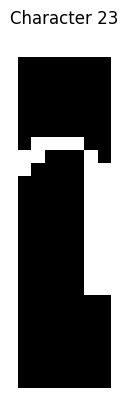

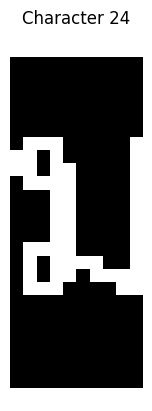

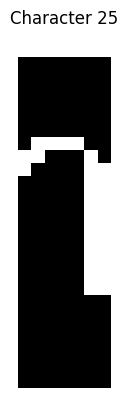

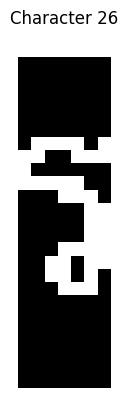

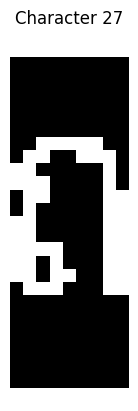

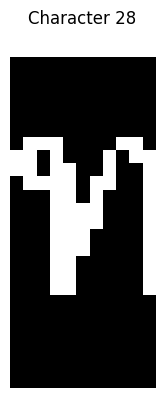

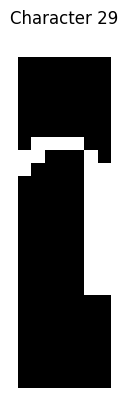

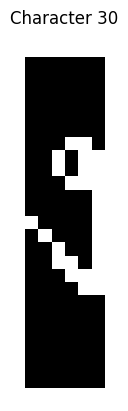

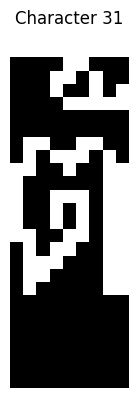

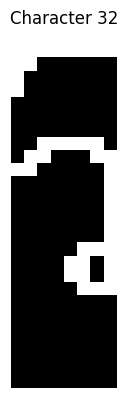

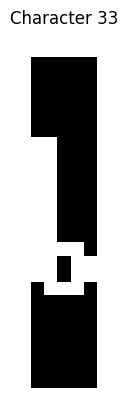

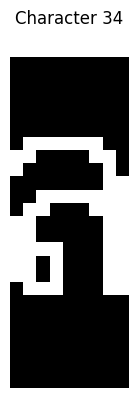

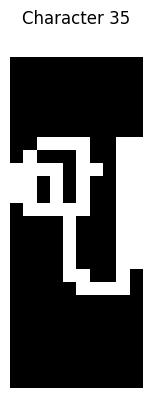

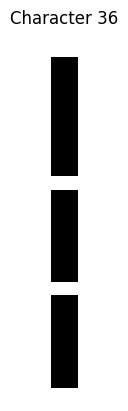

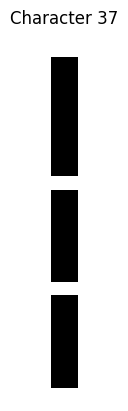

In [142]:
segmented_character = character_segmentation(cropped_thresh[3])

plt.figure()
plt.imshow(cropped_images[3], cmap='gray') 
plt.title('Original Image')
plt.axis('off')
plt.show()
for i, char_segment in enumerate(segmented_character):
    plt.figure()
    plt.imshow(char_segment, cmap='gray')
    plt.title(f'Character {i + 1}')
    plt.axis('off')
    plt.show()


In [136]:
from scipy.signal import find_peaks

def vowel_segmentation(word_segment):
    # Horizontal Projection
    horizontal_projection = np.sum(word_segment, axis=1)

    # Find peaks in the horizontal projection
    character_peaks, _ = find_peaks(horizontal_projection, height=3500)

    # Segment vowels
    segmented_vowels = []
    for i in range(len(character_peaks) - 1):
        top_row = character_peaks[i]
        bottom_row = character_peaks[i + 1]
        vowel_segment = word_segment[top_row:bottom_row, :]
        segmented_vowels.append(vowel_segment)

    # Add the last vowel segment
    last_vowel_segment = word_segment[character_peaks[-1]:, :]
    segmented_vowels.append(last_vowel_segment)

    return segmented_vowels

In [137]:
count = 0
for i, char_segment in enumerate(segmented_character):
    print(f"character {i} : {char_segment}")

# segmented_vowel = vowel_segmentation(segmented_character[1])

# for i, char_segment in enumerate(segmented_vowel):
#     print(char_segment)
#     cv2.imshow(f'Character {i + 1}', char_segment)


# cv2.waitKey(0)
# cv2.destroyAllWindows()

character 0 : [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255   0 ...   0   0 255]
 ...
 [255 255   0 ...   0   0 255]
 [255 255   0 ...   0   0 255]
 [255 255 255 ... 255 255 255]]
character 1 : [[255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0   0   0]
 [255 255   0   0   0 255 255 255   0]
 [255 255 255 255 255 255 255 255   0]
 [  0   0   0   0   0 255 255 255 255]
 [  0   0   0   0   0   0   0   0   0]
 [  0 255 255 255 255 255   0   0   0]
 [255 255   0   0   0 255 255   0   0]
 [255   0   0   0   0   0 255 255   0]
 [  0   0 255 255 255   0 255 255   0]
 [  0 255 255   0 255   0   0 255   0]
 [  0 255 255   0 255   0   0 255   0]
 [255 255 255 255 255   0   0 255   0]
 [255 255   0   0   0   0   0 255   0]
 [255   0   0   0   0   0   0 255   0]
 [255   0   0   0   0   0   0 255   0]
 [255   0   0   0   0   0   0 255   0]
 [255   0   0   0   0   0   0 255   0]


In [138]:
# vowel_characters = []
# for char_segment in segmented_character:
#     vowel_characters.append(vowel_segmentation(char_segment))

# for i, vowel_segment_list in enumerate(vowel_characters):
#     for j, vowel_segment in enumerate(vowel_segment_list):
#         cv2.imshow(f'Vowel {i + 1} - Segment {j + 1}', vowel_segment)
#         cv2.waitKey(0)

# cv2.destroyAllWindows()


In [139]:

# def vowel_segmentation(word_segment, character_threshold=3500, character_height=10, character_gap=5):
#     horizontal_projection = np.sum(word_segment, axis=1)
#     character_peaks, _ = find_peaks(horizontal_projection, height=character_threshold)

#     segmented_characters = []

#     for peak_row in character_peaks:
#         middle_row = peak_row
#         start_row = max(0, middle_row - character_height // 2 - character_gap)
#         end_row = min(word_segment.shape[0], middle_row + character_height // 2)
#         character_segment = word_segment[start_row:end_row, :]
#         segmented_characters.append(character_segment)

#     return segmented_characters


# def char_segmentation(image, character_threshold=3500, character_height=10, character_gap=5):
#     horizontal_projection = np.sum(image, axis=1)
#     character_peaks, _ = find_peaks(horizontal_projection, height=character_threshold)

#     segmented_characters = []

#     for i in range(len(character_peaks) - 1):
#         start_row = character_peaks[i]
#         end_row = character_peaks[i + 1]
#         character_segment = image[start_row:end_row, :]
#         segmented_characters.append(character_segment)
#     segmented_characters.append(image[character_peaks[-1]:, :])

#     return segmented_characters

In [140]:
# vo = characters_list[3]
# segmented_characters = char_segmentation(characters_list[3])

# for i, char_segment in enumerate(segmented_characters):
#     print(char_segment)
#     cv2.imshow(f'Character {i + 1}', char_segment)


# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [141]:
# segmented_vowel = vowel_segmentation(vo)

# for i, char_segment in enumerate(segmented_vowel):
#     cv2.imshow(f'Character {i + 1}', char_segment)


# cv2.waitKey(0)
# cv2.destroyAllWindows()